# Exploration Wells in the Irish Offshore

<https://www.isde.ie/geonetwork/srv/eng/catalog.search#/metadata/ie.marine.data:dataset.2171>

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile

import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "exploration-wells-irish-offshore")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://atlas.marine.ie/midata/EnergyResourcesExploration/"
    "Exploration_Wells_Irish_Offshore.shapezip.zip"
)
KNOWN_HASH = None
FILE_NAME = "Exploration_Wells_Irish_Offshore.shapezip.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# boundary data
ie = gpd.read_file(
    os.path.join("data", "boundaries.gpkg"), layer="NUTS_RG_01M_2021_4326_IE"
)

In [3]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-13]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 9a40c29082e359932b238828fe94ec1334f4fc2b5ea643648e47eeb7aeaa8949
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [3]:
with open(f"{DATA_FILE[:-13]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-09-15 12:56:05.840492+00:00
Download URL: https://atlas.marine.ie/midata/EnergyResourcesExploration/Exploration_Wells_Irish_Offshore.shapezip.zip


In [4]:
ZipFile(DATA_FILE).namelist()

['Exploration_Wells_Irish_Offshore.shapezip/',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.cpg',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.dbf',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.prj',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.sbn',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.sbx',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.shp',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.shp.xml',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.shx']

In [10]:
wells = gpd.read_file(
    os.path.join(f"zip://{DATA_FILE}!{FILE_NAME[:-4]}/{FILE_NAME[:-13]}.shp")
)

In [12]:
wells.shape

(173, 19)

In [13]:
wells.head()

,OBJECTID,REF_NO_,WELL_NO_,SPUD_LATID,SPUD_LONGI,DDLATITUDE,DDLONGITUD,WELL_CLASS,AREA,OPERATOR,RIG_NAME,TD__MD_,RIG_DATUM,WATER_DEPT,UNIT,SPUD_DATE,RIG_RELEAS,WELL_STATU,geometry
0,1,1,48/25-1,"51° 18' 55.100"" N","08° 03' 19.900"" W",51.3153056,-8.0555278,Exploration,North Celtic Sea Basin,Marathon,Glomar North Sea,10941,31,307,ft,1970-05-16,1971-02-25,P & A with/without shows or untested pay,POINT (-8.05708 51.31434)
1,2,2,50/11-1,"51° 34' 55.300"" N","06° 57' 18.500"" W",51.5820278,-6.9551389,Exploration,North Celtic Sea Basin,Marathon,Glomar North Sea,11906,31,236,ft,1971-02-27,1971-09-10,P & A with/without shows or untested pay,POINT (-6.95668 51.58109)
2,3,3,48/25-2,"51° 19' 39.505"" N","08° 05' 48.595"" W",51.3276403,-8.0968319,Exploration,North Celtic Sea Basin,Marathon,Glomar North Sea,6549,31,304,ft,1971-09-13,1971-11-09,P & A Gas Well,POINT (-8.09839 51.32668)
3,4,4,48/20-1A,"51° 21' 07.772"" N","08° 00' 21.764"" W",51.3521589,-8.0060456,Appraisal,North Celtic Sea Basin,Marathon,Glomar North Sea,7101,31,295,ft,1972-05-06,1972-07-25,P & A Gas Well,POINT (-8.00760 51.35120)
4,5,5,58/3-1,"50° 53' 46.693"" N","07° 35' 10.207"" W",50.8963036,-7.5861686,Exploration,South Celtic Sea Basin,Marathon,Glomar North Sea,9379,31,330,ft,1972-07-31,1972-09-23,P & A with/without shows or untested pay,POINT (-7.58770 50.89533)


In [14]:
wells.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/run/media/nms/Backup/Documents/Git/hydrogen-salt-storage-optimisation/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


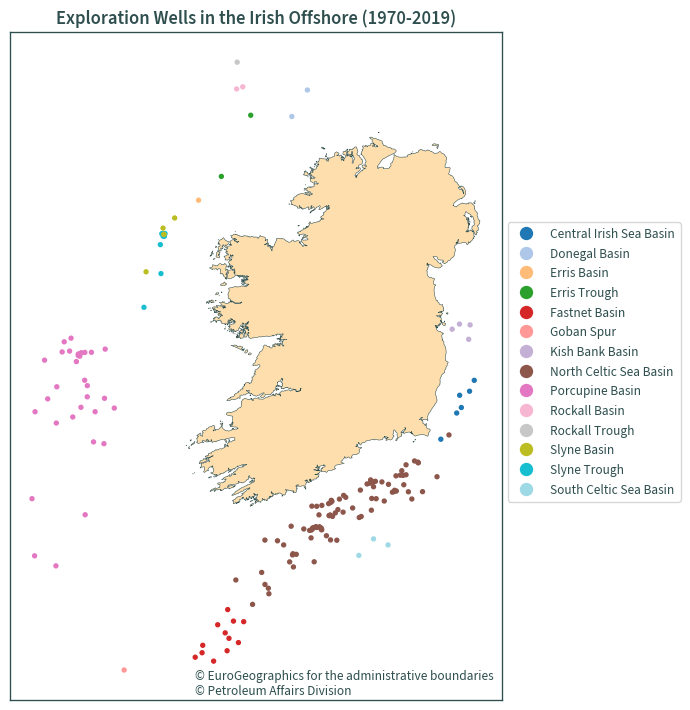

In [41]:
ax = ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)
wells.plot(
    ax=ax, column="AREA", legend=True, cmap="tab20", marker=".",
    legend_kwds={"loc": "upper right", "bbox_to_anchor": (1.375, .725)}
)

plt.title("Exploration Wells in the Irish Offshore (1970-2019)")

plt.text(
    -10.5, 49.4,
    "© EuroGeographics for the administrative boundaries\n"
    "© Petroleum Affairs Division"
)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()